In [1]:
import os
#counting the number of files in train folder
path,dirs,files=next(os.walk('D:\\python-Project\\Classification using Transfer Learning\\train\\train'))
file_count=len(files)
print('Number of image :',file_count)

Number of image : 2101


Printing the name of images


In [2]:
file_names=os.listdir('D:\\python-Project\\Classification using Transfer Learning\\train\\train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.155.jpg', 'cat.156.jpg', 'cat.157.jpg', 'cat.158.jpg', 'cat

importing the dependencies


In [3]:

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


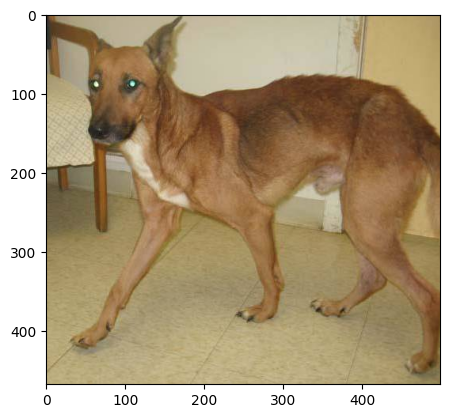

In [4]:
#Displaying dog images 
img=mpimg.imread('D:\\python-Project\\Classification using Transfer Learning\\train\\train\\dog.2078.jpg')
imgplot=plt.imshow(img)
plt.show()

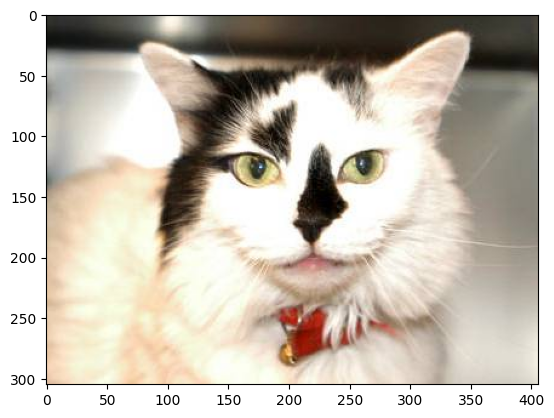

In [5]:
#Displaying cat images 
img=mpimg.imread('D:\\python-Project\\Classification using Transfer Learning\\train\\train\\cat.208.jpg')
imgplot=plt.imshow(img)
plt.show()

In [6]:
file_names=os.listdir('D:\\python-Project\\Classification using Transfer Learning\\train\\train')

dog_count=0
cat_count=0 

for img_file in file_names:
    name=img_file[0:3]

    if name=='dog':
        dog_count +=1
    else:
        cat_count +=1
print("Number of dog images=",dog_count)
print("Number of cat images=",cat_count)

Number of dog images= 1101
Number of cat images= 1001


Resizing all the images

In [7]:
#creating a directory for resized images
os.mkdir('D:\\python-Project\\Classification using Transfer Learning\\train\\train\\image_resized')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:\\python-Project\\Classification using Transfer Learning\\train\\train\\image_resized'

In [8]:
original_folder='D:\\python-Project\\Classification using Transfer Learning\\train\\train\\'
resized_folder='D:\\python-Project\\Classification using Transfer Learning\\train\\train\\image_resized\\'

for i in range(2000):
    filename=os.listdir(original_folder)[i]
    img_path=original_folder+filename
    img=Image.open(img_path)
    img=img.resize((224,224))
    img=img.convert('RGB')

    newimgpath=resized_folder+filename
    img.save(newimgpath)

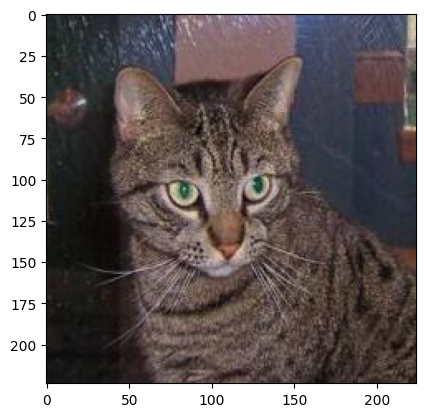

In [9]:
#Displaying resize cat images 
img=mpimg.imread('D:\\python-Project\\Classification using Transfer Learning\\train\\train\\image_resized\\cat.1.jpg')
imgplot=plt.imshow(img)
plt.show()

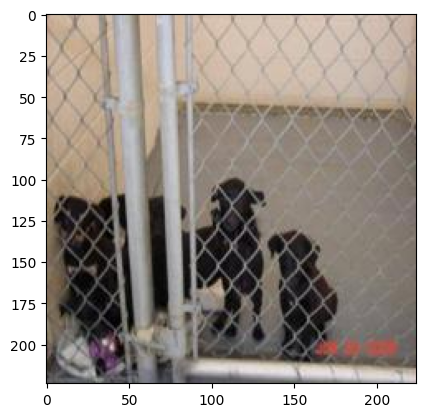

In [10]:
#Displaying resize dog images 
img=mpimg.imread('D:\\python-Project\\Classification using Transfer Learning\\train\\train\\image_resized\\dog.1358.jpg')
imgplot=plt.imshow(img)
plt.show()

Createing Labels for resized images of dogs and Cats

In [13]:
#creating a for loop to assign labels

filenames=os.listdir('D:\\python-Project\\Classification using Transfer Learning\\train\\train\\image_resized')

labels=[]

for i in range(2000):
    file_name=filenames[i]
    label=file_name[0:3]

    if label=='dog':
        labels.append(1)
    else:
        labels.append(0)

In [14]:
print(filenames[0:5])
print(len(filenames))
print(labels[0:5])
print(len(labels))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
2000
[0, 0, 0, 0, 0]
2000


In [15]:
#creating the images of dogs and cats out of 2000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


converting all the resized images to numpy array

In [16]:
import cv2
import glob

image_directory='D:\\python-Project\\Classification using Transfer Learning\\train\\train\\image_resized\\'
image_extension=['png','jpg']

files=[]

[files.extend(glob.glob(image_directory + '*.'+e))for e in image_extension]
dog_cat_images=np.asarray([cv2.imread(file) for file in files])
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 201 247]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [173 197 203]
   [164 192 199]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 201]
   [167 195 202]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [171 198

In [17]:
type(dog_cat_images)
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [18]:
X=dog_cat_images
Y=np.asarray(labels)

Train Test Split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600(training images)
400(test images)

In [20]:
#scaling the data
X_train_scaled=X_train/255

X_test_scaled=X_test/255
print(X_train_scaled)

[[[[0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   ...
   [0.84705882 0.85098039 0.84313725]
   [0.84705882 0.85098039 0.84313725]
   [0.84705882 0.85098039 0.84313725]]

  [[0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   ...
   [0.83529412 0.83921569 0.83137255]
   [0.83529412 0.83921569 0.83137255]
   [0.83529412 0.83921569 0.83137255]]

  [[0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   [0.77647059 0.79607843 0.78823529]
   ...
   [0.82745098 0.83137255 0.82352941]
   [0.82352941 0.82745098 0.81960784]
   [0.82352941 0.82745098 0.81960784]]

  ...

  [[0.74901961 0.75686275 0.76078431]
   [0.74509804 0.75294118 0.75686275]
   [0.73333333 0.74117647 0.74509804]
   ...
   [0.74509804 0.74901961 0.74117647]
   [0.74509804 0.74901961 0.74117647]
   [0.74509804 0.74901961 0.74117647]]

  [[0.76862745 0.77647059 0.78039216]
   [0.7

building the neural network

In [21]:
import tensorflow as tf
import tensorflow_hub as hub

In [22]:
mobilenet_model='https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/classification/2'
pretrained_model=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [23]:
num_of_classes=2

model=tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              14467622  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 14,469,624
Trainable params: 2,002
Non-trainable params: 14,467,622
_________________________________________________________________


In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [25]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 132s 2s/step - loss: 0.1269 - acc: 0.9563
Epoch 2/5
50/50 [==============================] - 106s 2s/step - loss: 0.0554 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 108s 2s/step - loss: 0.0422 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 109s 2s/step - loss: 0.0327 - acc: 0.9919
Epoch 5/5
50/50 [==============================] - 113s 2s/step - loss: 0.0291 - acc: 0.9894


In [26]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('Test Loss=',score)
print('Test Accuracy=',acc)

13/13 [==============================] - 28s 2s/step - loss: 0.0865 - acc: 0.9650
Test Loss= 0.08651944994926453
Test Accuracy= 0.9649999737739563


Predictive System

In [29]:
input_image_path=input('path of the image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow=(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if input_pred_label==0:
    print('The image represents a cat')
else:
    print('The image represents a Dog')

1/1 [==============================] - 0s 147ms/step
The image represents a cat
